In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from finpie.datasource.service import DataService
from finpie.analytics import Statistical, Technical
from finpie.data import TimeSeries, RatioTimeSeries

# Create data service with default sources
data_service = DataService.create_default_service()

# Set date range
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

Simple Trading Strategy on Prices

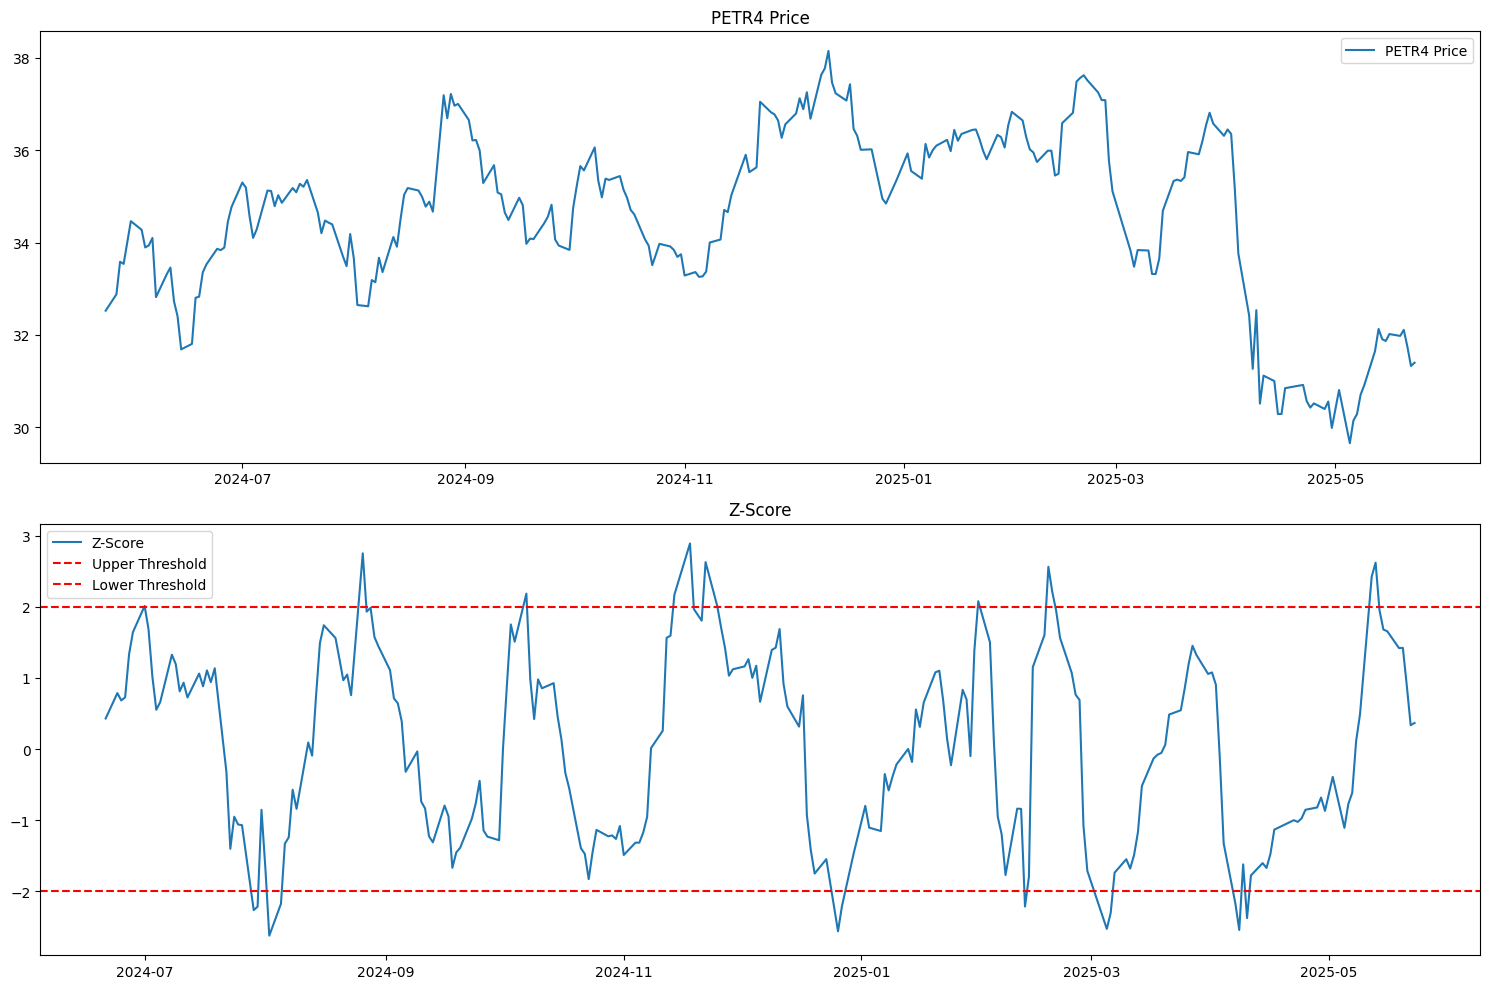

In [2]:
# 1. Get prices for PETR4
petr4_prices = data_service.get_close_prices('PETR4.SA', start_date=start_date, end_date=end_date, source='yahoo_finance')

# 2. Create timeseries with rolling ZScore
stats = Statistical(petr4_prices, column='close')
zscore = stats.zscore(window=20)

# 3. Create trading signals
signals = stats.trading_signals(zscore_threshold=2.0, window=20)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
ax1.plot(petr4_prices.data.index, petr4_prices.data['close'], label='PETR4 Price')
ax1.set_title('PETR4 Price')
ax1.legend()

ax2.plot(zscore.index, zscore, label='Z-Score')
ax2.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
ax2.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold')
ax2.set_title('Z-Score')
ax2.legend()

plt.tight_layout()
plt.show()

Simple Trading Strategy on Returns


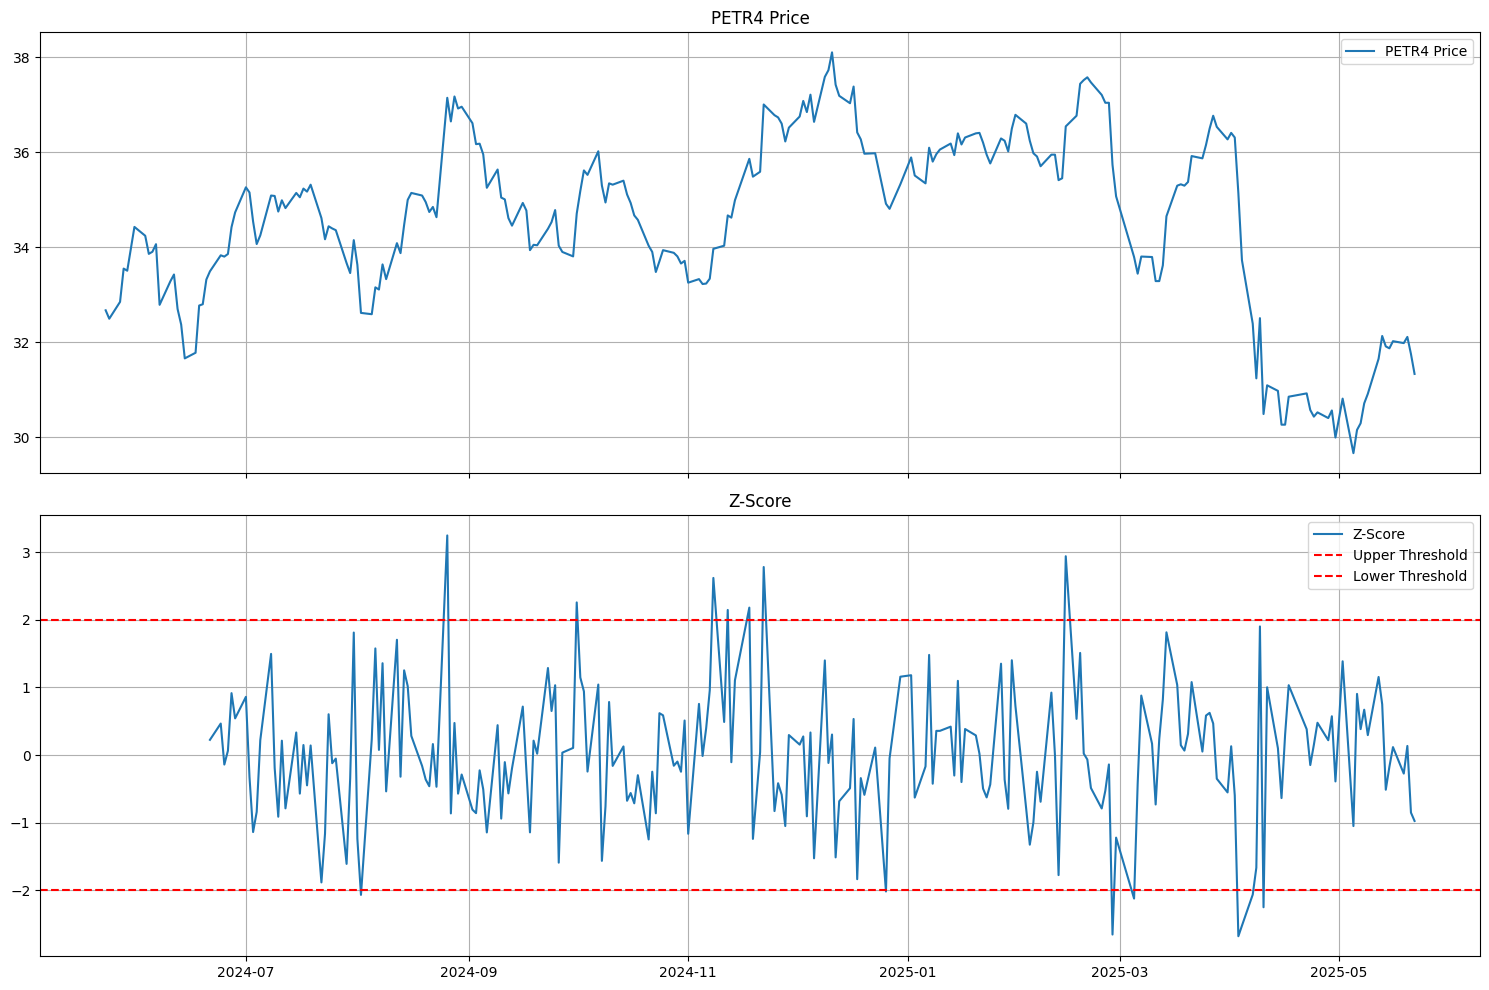

In [3]:
# 1. Get prices for PETR4
petr4_prices = data_service.get_close_prices('PETR4.SA', start_date=start_date, end_date=end_date, source='yahoo_finance')

# 2. Get returns
petr4_returns = petr4_prices.returns()

# 3. Create timeseries with rolling ZScore of returns
stats = Statistical(petr4_returns, column='close')
zscore = stats.zscore(window=20)

# 4. Create trading signals
signals = stats.trading_signals(zscore_threshold=2.0, window=20)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax1.plot(petr4_prices.data.index, petr4_prices.data['close'], label='PETR4 Price')
ax1.set_title('PETR4 Price')
ax1.legend()
ax1.grid(True)

ax2.plot(zscore.index, zscore, label='Z-Score')
ax2.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
ax2.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold')
ax2.set_title('Z-Score')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Simple Trading Strategy on RSI


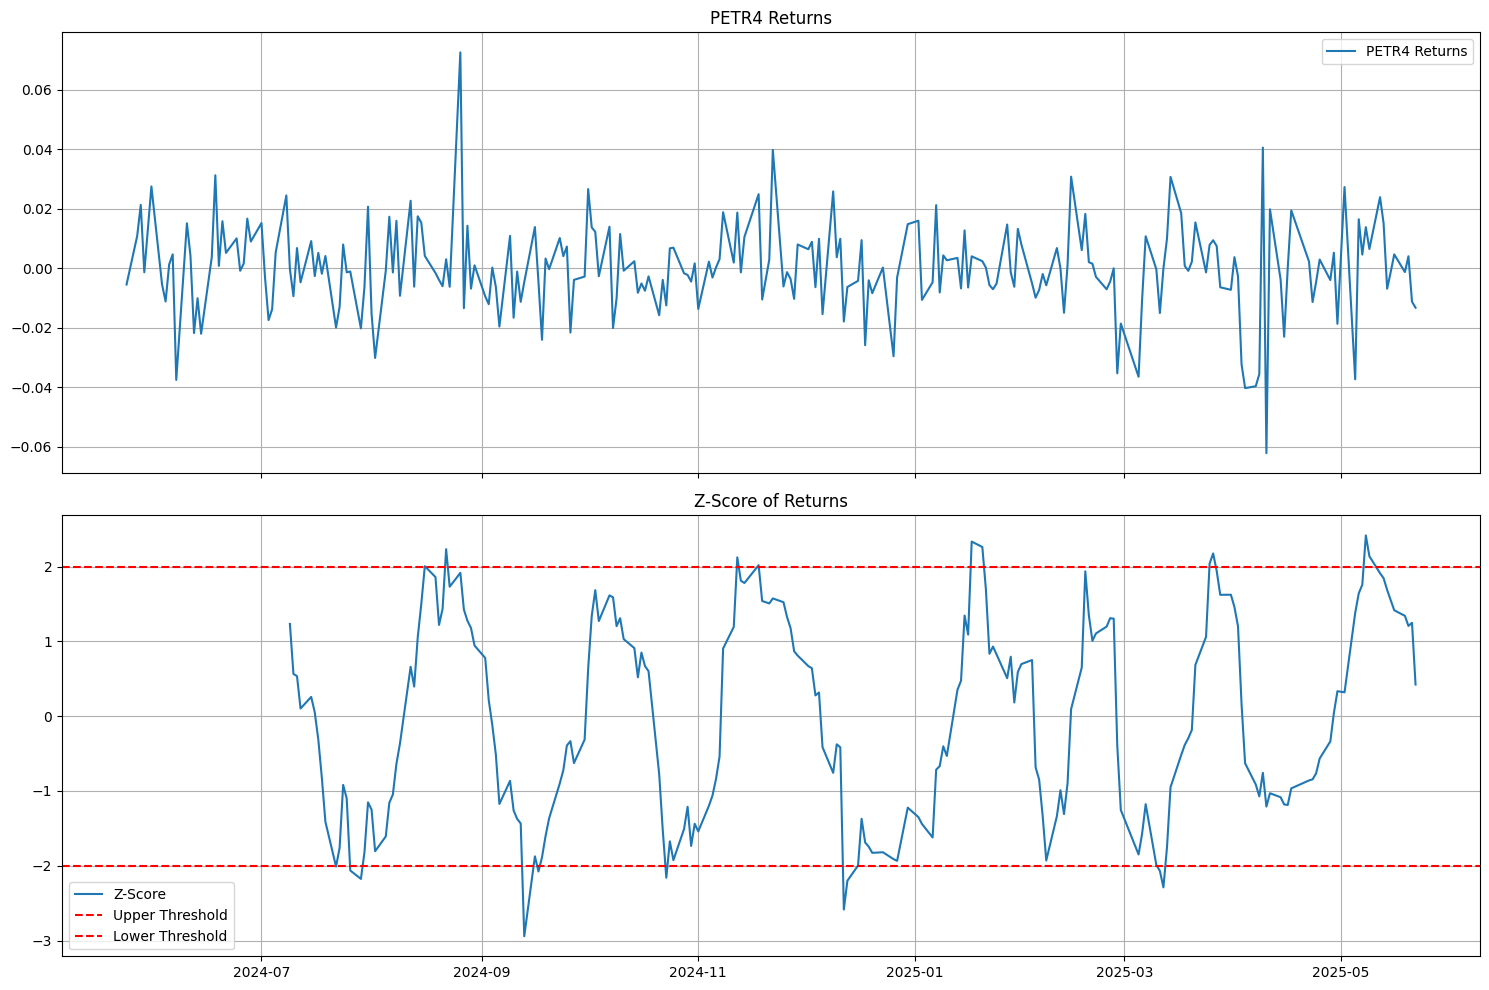

In [4]:
# 1. Get prices for PETR4
petr4_prices = data_service.get_close_prices('PETR4.SA', start_date=start_date, end_date=end_date, source='yahoo_finance')

# 2. Get RSI indicator
tech = Technical(petr4_prices, column='close')
rsi = tech.rsi(window=14)

# 3. Create timeseries with rolling ZScore of RSI
stats = Statistical(rsi, column='rsi_14')
zscore = stats.zscore(window=20)

# 4. Create trading signals
signals = stats.trading_signals(zscore_threshold=2.0, window=20)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax1.plot(petr4_returns.data.index, petr4_returns.data['close'], label='PETR4 Returns')
ax1.set_title('PETR4 Returns')
ax1.legend()
ax1.grid(True)

ax2.plot(zscore.index, zscore, label='Z-Score')
ax2.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
ax2.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold')
ax2.set_title('Z-Score of Returns')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Simple Pair Trading Strategy

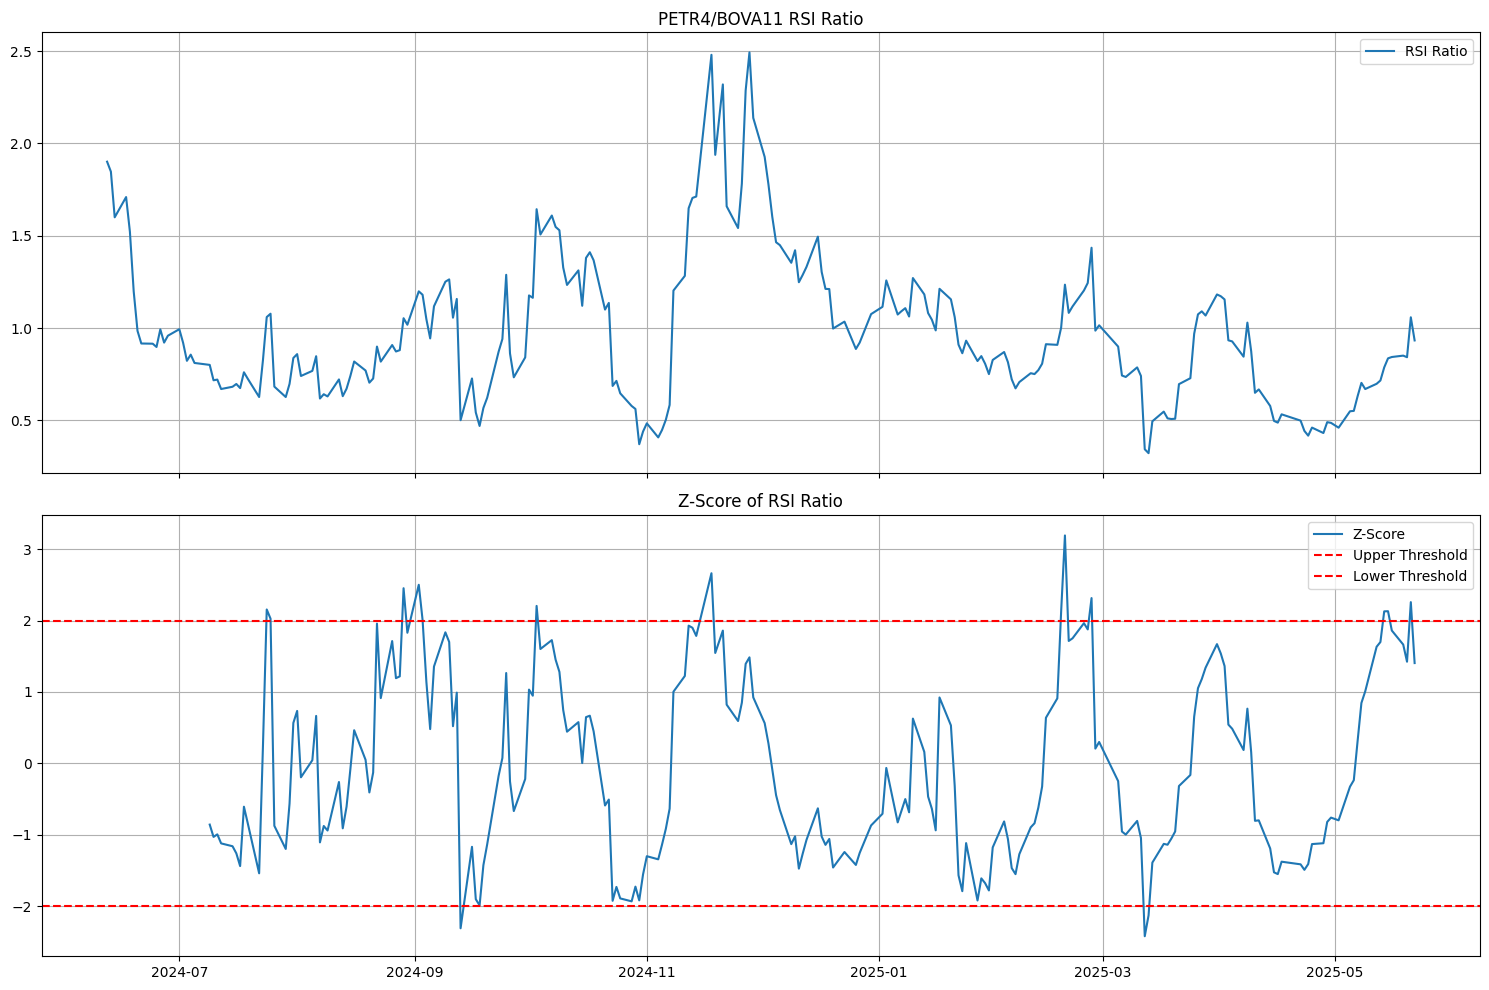

In [5]:
# 1. Get prices for PETR4 and BOVA11
petr4_prices = data_service.get_close_prices('PETR4.SA', start_date=start_date, end_date=end_date, source='yahoo_finance')
bova11_prices = data_service.get_close_prices('BOVA11.SA', start_date=start_date, end_date=end_date, source='yahoo_finance')

# 2. Get RSI indicators
petr4_tech = Technical(petr4_prices, column='close')
bova11_tech = Technical(bova11_prices, column='close')

petr4_rsi = petr4_tech.rsi(window=14)
bova11_rsi = bova11_tech.rsi(window=14)

# 3. Create ratio timeseries
rsi_ratio = RatioTimeSeries(petr4_rsi, bova11_rsi)

# 4. Create timeseries with rolling ZScore of RSI ratio
stats = Statistical(rsi_ratio, column='ratio')
zscore = stats.zscore(window=20)

# 5. Create trading signals
signals = stats.trading_signals(zscore_threshold=2.0, window=20)

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax1.plot(rsi_ratio.data.index, rsi_ratio.data['ratio'], label='RSI Ratio')
ax1.set_title('PETR4/BOVA11 RSI Ratio')
ax1.legend()
ax1.grid(True)

ax2.plot(zscore.index, zscore, label='Z-Score')
ax2.axhline(y=2, color='r', linestyle='--', label='Upper Threshold')
ax2.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold')
ax2.set_title('Z-Score of RSI Ratio')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()